In [4]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

In [3]:
tf.__version__

'2.3.0'

Sequential API


In [5]:
def seq_model():
  seq_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape =(28, 28)),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax) ])
  return seq_model

Functional api

In [10]:
def fun_model():
  input = tf.keras.Input(shape=(28, 28))

  x = tf.keras.layers.Flatten()(input)
  x = tf.keras.layers.Dense(128, activation = 'relu')(x)
  output = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(x)

  x = Model(inputs=input, outputs=output)

  return x

In [11]:
model = fun_model()

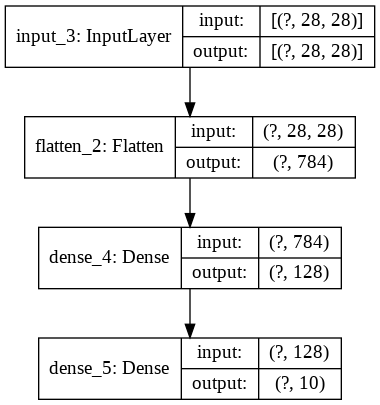

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [13]:
model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
mnist = tf.keras.datasets.fashion_mnist

In [17]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [19]:
model.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8848
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8741


[0.3457467257976532, 0.8741000294685364]